# PIK3CA: Effects of Mutation on CDK5

<b> CDK5 is the catylyctic kinase involved in phosphorylating IRS2, which activates PIK3CA, at a specific site showing significant results (http://regphos.mbc.nctu.edu.tw/show_prediction.php?substrate_ID=IRS2_HUMAN&pos=391) </b>

<b> Standard imports for playing with and plotting data frames. </b>

In [10]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

<b> Import CPTAC data

In [11]:
import CPTAC

In [12]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and CDK5 proteome abundance

### Take out the control (101 - 140)

In [13]:
proteomics = proteomics[:100]

### Perform a t-test with mutated and non-mutated protein levels

In [14]:
protList = ['CDK5']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'


sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] != "Wildtype"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for CDK5: 
Ttest_indResult(statistic=2.0684520334765586, pvalue=0.041230997730369444)


 ### We can now plot the data 

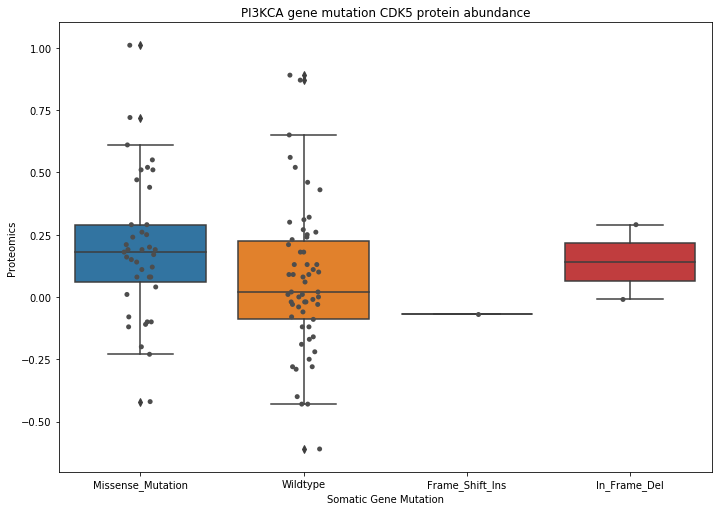

In [15]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='CDK5', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation CDK5 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='CDK5',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PIK3CA mutation and CDK5 phosphoproteome abundance 

In [16]:
phosProtList = ['CDK5']

In [17]:
sites = phos.columns
p_values = []
site_names = []
protein = 'CDK5'


pattern = re.compile(protein)
isInList = filter(pattern.search, sites)
if next(isInList, None) is not None:
    phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
    phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
    for site in phosphositesdf.columns:
        if (site is not 'Mutation'):
            sitedf = CPTAC.compare_mutations(phos, site, gene)
            mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
            wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
            ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
            p_values.append(ttest[1])
            site_names.append(site)     
                
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

['CDK5RAP2-S1061']
[0.02708321]
{'CDK5RAP2-S1061': 0.027083210473657415}


In [18]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)

phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor']

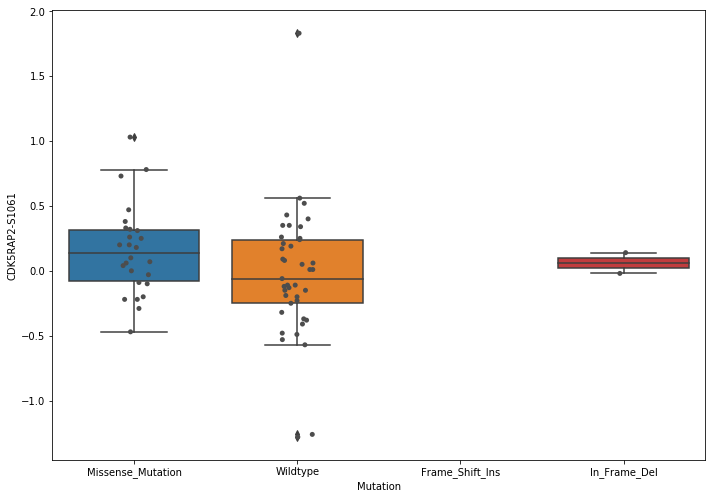

In [19]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'CDK5RAP2-S1061')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'CDK5RAP2-S1061', jitter = True, color = '.3')
plt.show()